# Sieci neuronowe i Deep Learning
# Temat 4: Biblioteka PyTorch - wprowadzenie

Kod pisany i testowany przy wersjach:

numpy: 1.21.2

matplotlib: 3.4.3

torch: 1.9.0

## Wprowadzenie do biblioteki PyTorch

### Instalacja biblioteki PyTorch
W razie problemów z instalacją, sprawdzić aktualne instrukcje na https://pytorch.org (https://pytorch.org/get-started/locally/).

In [1]:
# Instalacja PyTorch z repozytorium PyPI:
! pip install torch
# ! pip install torch==1.9.0

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 2.6.0+cpu


### Tworzenie tensorów w PyTorch

In [3]:
# Tworzenie tensorów z listy lub NumPy array:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [4]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [5]:
t_ones = torch.ones(2, 3)  # Funkcja tworzy tensor wypełniony wartościami 1 o rozmiarach określonych przez jej argumenty

t_ones.shape

torch.Size([2, 3])

In [6]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
rand_tensor = torch.rand(4,3,2)  # Tensor z losowych elementów

print(rand_tensor)

tensor([[[0.4352, 0.9772],
         [0.2185, 0.8261],
         [0.0091, 0.6629]],

        [[0.2270, 0.1592],
         [0.8161, 0.2946],
         [0.9409, 0.3832]],

        [[0.0513, 0.6293],
         [0.9095, 0.5313],
         [0.0338, 0.4935]],

        [[0.0598, 0.5861],
         [0.5081, 0.9132],
         [0.0090, 0.3826]]])


### Operacje na typach tensorów i ich kształtach oraz rozmiarach

In [8]:
# .dtype to atrybut, który informuje, jakiego typu danych są wartości w tensorze
# (torch.float32, torch.float64, torch.int32, torch.int64 (alias torch.long), torch.bool itd.)
print(t_a.dtype)

torch.int64


In [9]:
# Zmiana typu tensor na inny (torch.to()):
t_a_new = t_a.to(torch.int32)

print(t_a_new.dtype)

torch.int32


Wszystkie typy danych: https://pytorch.org/docs/stable/tensor_attributes.html.

Poniżej przedstawiono jak wykonywać przykładowe
operacja na rzędzie (rank) i rozmiarach (shape) tensorów.

In [10]:
t = torch.rand(3, 5) # Generowania tensora z wartościami losowymi z rozkładu jednostajnego na przedziale [0, 1)

t_tr = torch.transpose(t, 0, 1) # Transpozycja tensora t przez zamianę
                                # jego pierwszego wymiaru (o indeksie 0)
                                # z drugim wymiarem (o indeksie 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [11]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)  # Zmiana kształtu z 1D na 2D (bez zmiany zawartości)
                             # Liczba elementów musi się zgadzać przed i po zmianie kształtu
print(t_reshape.shape)

torch.Size([5, 6])


In [12]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)  # Usuwamy wymiary (tutaj o indeksie 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Przykładowe działania matematyczne na tensorach

In [13]:
# torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1  # torch.rand() generuje liczby z rozkładu jednostajnego na [0, 1)
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [14]:
t3 = torch.multiply(t1, t2)  # Mnożenie element * element
print(t3)

tensor([[-0.6865,  0.1847],
        [ 0.6536, -0.1406],
        [-0.3746, -0.5874],
        [ 0.2048,  0.7252],
        [ 0.0371, -0.7321]])


In [15]:
t4 = torch.mean(t1, axis=0)  # dim (axis) – numer osi (wymiaru), wzdłuż której liczona jest średnia
                             # dim=0	wzdłuż wierszy	średnia kolumnowa – dla każdej kolumny
                             # dim=1	wzdłuż kolumn	średnia wierszowa – dla każdego wiersza
print(t4)

tensor([-0.2719,  0.5404])


In [16]:
t4 = torch.mean(t1, dim=0)
print(t4)

tensor([-0.2719,  0.5404])


Analogicznie działają na przykład funkcje torch.sum(), torch.std().

In [17]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))  # Mnożenie t_1 razy t_2^T
                                                  # (mnożenia macierzy lub tensorów w stylu matematycznym)
print(t5)

tensor([[-0.5017, -1.5988, -0.9555,  0.4234, -0.2549],
        [ 0.6531,  0.5131,  0.0281,  0.2023, -0.2269],
        [ 0.3519, -0.9838, -0.9620,  0.7146, -0.5713],
        [ 0.2911, -1.5191, -1.3425,  0.9300, -0.7239],
        [ 1.1796,  0.1263, -0.5699,  0.7500, -0.6950]])


In [18]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)  # Mnożenie t_1^T razy t_2

print(t6)

tensor([[-0.1655, -1.7079],
        [ 1.0943, -0.5501]])


In [19]:
# Liczenie normy L^p dla tensora, np. norma l^2 dla tensora t1:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)  # dim=1 określa wymiar, wzdłuż którego ma być obliczana norma
                                               # (obliczamy normę dla każdego wiersza niezależnie)

print(norm_t1)

tensor([0.9224, 0.5053, 0.7432, 1.0296, 0.9092])


In [20]:
print(t1)

tensor([[-0.9073,  0.1663],
        [ 0.3885,  0.3232],
        [-0.4276,  0.6079],
        [-0.7102,  0.7455],
        [ 0.2972,  0.8592]])


In [21]:
# Dla sprawdzenia, wprost, używając funkcji z NumPy:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.922, 0.505, 0.743, 1.03 , 0.909], dtype=float32)

### Dzielenie i łączenie tensorów

Funkcja **torch.chunk()** dzieli tensor na tensory o równym rozmiarze;

chunks = liczba podziałów,

dim = wymiar, wzdłuż którego robiony jest podział.

In [22]:
t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, chunks=2)

[item.numpy() for item in t_splits]  # Zamieniamy każdy kawałek tensora item na tablicę NumPy i tworzymy listę

tensor([0.3517, 0.2484, 0.8406, 0.2052, 0.1472, 0.6821])


[array([0.352, 0.248, 0.841], dtype=float32),
 array([0.205, 0.147, 0.682], dtype=float32)]

In [23]:
t = torch.rand(6, 8)

print(t)

t_splits = torch.chunk(t, chunks=2, dim=0)

[item.numpy() for item in t_splits]

tensor([[0.5903, 0.2614, 0.4744, 0.5350, 0.5184, 0.0450, 0.6977, 0.1829],
        [0.5957, 0.1252, 0.0367, 0.7625, 0.9474, 0.5413, 0.3973, 0.3076],
        [0.4365, 0.6379, 0.3631, 0.9104, 0.2405, 0.5289, 0.6096, 0.5946],
        [0.2978, 0.5687, 0.9112, 0.1738, 0.1404, 0.2488, 0.1652, 0.2033],
        [0.5204, 0.6778, 0.3510, 0.1511, 0.4169, 0.4314, 0.2438, 0.9547],
        [0.1211, 0.9316, 0.9384, 0.6894, 0.0936, 0.6012, 0.0929, 0.5970]])


[array([[0.59 , 0.261, 0.474, 0.535, 0.518, 0.045, 0.698, 0.183],
        [0.596, 0.125, 0.037, 0.762, 0.947, 0.541, 0.397, 0.308],
        [0.437, 0.638, 0.363, 0.91 , 0.24 , 0.529, 0.61 , 0.595]],
       dtype=float32),
 array([[0.298, 0.569, 0.911, 0.174, 0.14 , 0.249, 0.165, 0.203],
        [0.52 , 0.678, 0.351, 0.151, 0.417, 0.431, 0.244, 0.955],
        [0.121, 0.932, 0.938, 0.689, 0.094, 0.601, 0.093, 0.597]],
       dtype=float32)]

Używając funkcji **torch.split()**,
można podać rozmiary tensorów z podziału.

In [24]:
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])  # Pierwszy fragment ma długość 3, drugi fragment ma długość 2

[item.numpy() for item in t_splits]

tensor([0.5667, 0.6292, 0.9245, 0.6392, 0.5827])


[array([0.567, 0.629, 0.925], dtype=float32),
 array([0.639, 0.583], dtype=float32)]

W przypadku większej liczby wymiarów specyfikujemy parametr `dim` (względem którego wymiaru dzielimy).

Funkcje
**torch.stack()** i **torch.cat()**
dają możliwość łączenia tensorów w jeden większy tensor.

In [25]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)  # axis=0 określa wymiar, wzdłuż którego
                               # tensory mają być połączone (wartość 0: wzdłuż pierwszego wymiaru)

print(A)
print(B)
print(C)

tensor([1., 1., 1.])
tensor([0., 0.])
tensor([1., 1., 1., 0., 0.])


In [26]:
A = torch.ones(3,4)
B = torch.zeros(3,4)

C = torch.cat([A, B], axis=1)  # axis=0 określa wymiar, wzdłuż którego
                               # tensory mają być połączone (wartość 0: wzdłuż pierwszego wymiaru)

print(A)
print(B)
print(C)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])


Funkcja **torch.stack()** w PyTorch służy do łączenia sekwencji tensorów wzdłuż nowego wymiaru. Wszystkie tensory w sekwencji muszą mieć ten sam kształt.

In [27]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
T = torch.stack([A, B], axis=0)

print(A)
print(B)

print(S)
print(T)

tensor([1., 1., 1.])
tensor([0., 0., 0.])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
tensor([[1., 1., 1.],
        [0., 0., 0.]])


Dokumentacja biblioteki PyTorch:
https://pytorch.org/docs/stable/index.html.

## Programowanie procedury ładowania danych w PyTorch

### Ładowanie danych z istniejącego tensora

Jeśli mamy dane w postaci tensorów, list Python lub tablic NumPy,
moduł wczytujący dane można w łatwy posób utworzyć, używając klasy
**torch.utils.data.DataLoader** (klasa DataLoader z modułu torch.utils.data w bibliotece PyTorch).

Obiekt klasy **DataLoader** umożliwia iterowanie po elementach wejściowego zbioru danych.

In [28]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [29]:
print(t)

tensor([0., 1., 2., 3., 4., 5.])


In [30]:
# Iterujemy element po elemencie:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [31]:
# Można podawać w batchach (tutaj powstaną dwa batche):
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):  # enumerate() jest używana do śledzenia indeksu partii
                                            # (numeracji partii zaczynającej się od 1 dzięki argumentowi 1)
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Łączenie tensorów w jeden zbiór danych
Mamy np. tensor z cechami i tensor z etykietami. Potrzebujemy stworzyć zbiór danych poprzez połączenie tych tensorów.

In [32]:
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [33]:
print(t_x)
print(t_y)

tensor([[0.0845, 0.3465, 0.9957],
        [0.9697, 0.4346, 0.6055],
        [0.0702, 0.2209, 0.1658],
        [0.3395, 0.1781, 0.3776]])
tensor([0, 1, 2, 3])


`Dataset` to abstrakcyjna klasa reprezentująca zbiór danych. W PyTorch można stworzyć własną klasę zbioru danych przez dziedziczenie po torch.utils.data.Dataset i zaimplementowanie metod `__len__` (która zwraca liczbę przykładów w zbiorze danych) oraz `__getitem__` (która pobiera i zwraca pojedynczy przykład z zbioru danych na podstawie indeksu). 

Definiujemy klasę `JointDataset`, która dziedziczy po klasie `Dataset` z modułu `torch.utils.data` biblioteki PyTorch.

Metoda `__len__` zwraca całkowitą liczbę elementów w zestawie danych. Jest to wymagane przez klasę `Dataset` w PyTorch, ponieważ pozwala to na używanie funkcji `len()` na obiektach `JointDataset` oraz na iterowanie po zestawie danych w pętlach i `DataLoaderach`.

Metoda `__getitem__` umożliwia dostęp do pojedynczych elementów zestawu danych za pomocą indeksu `idx`.

In [34]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [35]:
# Tworzymy połączony zbiór danych:
joint_dataset = JointDataset(t_x, t_y)

In [36]:
# Iterujemy po połączonym zbiorze danych:
for example in joint_dataset:
    print('x: ', example[0], 
          '  y: ', example[1])

x:  tensor([0.0845, 0.3465, 0.9957])   y:  tensor(0)
x:  tensor([0.9697, 0.4346, 0.6055])   y:  tensor(1)
x:  tensor([0.0702, 0.2209, 0.1658])   y:  tensor(2)
x:  tensor([0.3395, 0.1781, 0.3776])   y:  tensor(3)


In [ ]:
# Można też tak:
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

### Permutujemy, dzielimy na batche, permutujemy, dzielimy na batche, permutujemy, dzielimy na batche...

Jak permutować zbiór danych przed każdą epoką?

In [37]:
# Kontynuujemy przykład z joint_dataset:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)  # shuffle=True, aby permutował wiersze

# Iterujemy element po elemencie:
for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        


batch 1: x: tensor([[0.9697, 0.4346, 0.6055],
        [0.0845, 0.3465, 0.9957]]) 
         y: tensor([1, 0])
batch 2: x: tensor([[0.0702, 0.2209, 0.1658],
        [0.3395, 0.1781, 0.3776]]) 
         y: tensor([2, 3])


In [38]:
for epoch in range(10):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.0702, 0.2209, 0.1658],
        [0.3395, 0.1781, 0.3776]]) 
         y: tensor([2, 3])
batch 2: x: tensor([[0.0845, 0.3465, 0.9957],
        [0.9697, 0.4346, 0.6055]]) 
         y: tensor([0, 1])
epoch 2
batch 1: x: tensor([[0.3395, 0.1781, 0.3776],
        [0.0845, 0.3465, 0.9957]]) 
         y: tensor([3, 0])
batch 2: x: tensor([[0.0702, 0.2209, 0.1658],
        [0.9697, 0.4346, 0.6055]]) 
         y: tensor([2, 1])
epoch 3
batch 1: x: tensor([[0.0845, 0.3465, 0.9957],
        [0.0702, 0.2209, 0.1658]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.3395, 0.1781, 0.3776],
        [0.9697, 0.4346, 0.6055]]) 
         y: tensor([3, 1])
epoch 4
batch 1: x: tensor([[0.0702, 0.2209, 0.1658],
        [0.0845, 0.3465, 0.9957]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.3395, 0.1781, 0.3776],
        [0.9697, 0.4346, 0.6055]]) 
         y: tensor([3, 1])
epoch 5
batch 1: x: tensor([[0.9697, 0.4346, 0.6055],
        [0.0845, 0.3465, 0.9957]]) 
      

### Tworzenie zbioru danych z plików z lokalnego dysku

Zrobimy to na przykładzie plików ze zdjęciami (kotów i psów).

Moduł `Image` z biblioteki `PIL` - do czytania zawartości plików z obrazami.

Moduł `transforms` z `torchvision` - do dekodowania surowych danych oraz do zmiany rozmiaru obrazów.

In [39]:
# Na początek przyjrzyjmy się zawartościom rozważanych plików
# Użyjemy modułu pathlib - 
# zawiera klasę Path, która umożliwia wygodne i obiektowe operacje na ścieżkach systemu plików

import pathlib

# Tworzymy obiekt Path, reprezentujący ścieżkę do katalogu o nazwie cat_dog_images:
imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


In [ ]:
# Wykorzystując Matplotlib oraz PIL, można zwizualizować te pliki
# (wyświetlić obrazy z listy ścieżek do plików):
import matplotlib.pyplot as plt
import os
from PIL import Image  # Importuje klasę Image z biblioteki Pillow (PIL) - do zarządzania obrazami


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


In [43]:
# Etykiety obrazów znajdują się na ten moment w nazwach plików. Tworzymy etykiety: 1 - dog, 0 - cat:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [44]:
# Mamy dwie listy: listę nazw plików (lub ścieżek) i listę etykiet. Łączymy je:

class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [45]:
! pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 2.3 MB/s eta 0:00:00


Potrzebne transformacje:
ładowanie obrazu ze ścieżki + dekodowanie + zmiana rozmiaru.

Możliwość zmiany rozmiaru obrazu daje moduł
`torchvision.transforms`.

In [46]:
import torchvision.transforms as transforms  # Moduł transforms zawiera zestaw gotowych transformacji obrazów

img_height, img_width = 80, 120
    
transform = transforms.Compose([  # Tworzy łańcuch transformacji (pipeline)
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

In [47]:
# Dodajemy transform (który zdefiniowaliśmy powyżej) do klasy ImageDataset:

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0005550324..1.0000002].


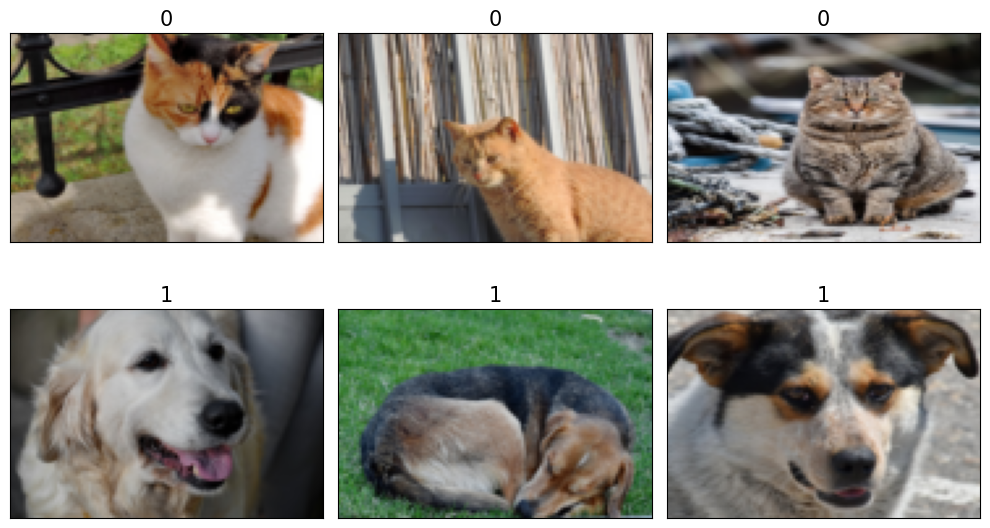

In [48]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()

Metoda `__getitem__` z klasy ImageDataset wykonuje cały proces operacji na danych (od załadowania surowych danych do zwrócenia danych gotowych do dalszego procesowania - np. uczenia sieci neuronowej).

-------------------------

`torchvision.datasets` to moduł w bibliotece torchvision, który zawiera gotowe do użycia zbioru danych, wykorzystywane w zadaniach uczenia maszynowego, głównie w wizji komputerowej (computer vision).

Dzięki niemu można bardzo łatwo załadować popularne zestawy danych bez ręcznego pobierania, rozpakowywania czy wczytywania obrazów.

https://pytorch.org/vision/stable/datasets.tml
